In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

In [189]:
train = pd.read_csv('train.csv')
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [190]:
train.shape

(140700, 20)

In [191]:
train.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [192]:
train.duplicated().sum()

0

In [193]:
train.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


<Axes: xlabel='Depression'>

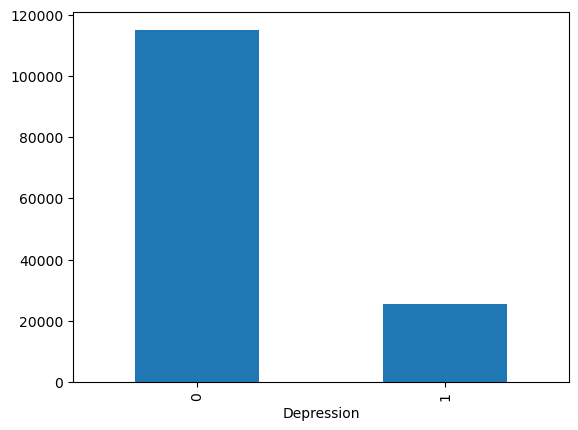

In [321]:
train['Depression'].value_counts().plot(kind='bar')

In [194]:
test = pd.read_csv('test.csv')
test.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [195]:
test.shape

(93800, 19)

In [196]:
test.isnull().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [197]:
test.duplicated().sum()

0

In [198]:
combined = pd.concat([train, test], axis = 0)
combined.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0.0


In [199]:
combined.shape

(234500, 20)

In [281]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234500 entries, 0 to 93799
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     234500 non-null  int64  
 1   Name                                   234500 non-null  object 
 2   Gender                                 234500 non-null  object 
 3   Age                                    234500 non-null  float64
 4   City                                   234500 non-null  object 
 5   Working Professional or Student        234500 non-null  object 
 6   Profession                             234500 non-null  object 
 7   Academic Pressure                      234500 non-null  float64
 8   Work Pressure                          234500 non-null  float64
 9   CGPA                                   234500 non-null  float64
 10  Study Satisfaction                     234500 non-null  float6

In [201]:
combined['Gender'].value_counts()

Gender
Male      128726
Female    105774
Name: count, dtype: int64

In [202]:
combined['City'] = combined['City'].replace({"Less Delhi": "Delhi", "Molkata": "Kolkata", "Tolkata": "Kolkata", "Khaziabad": "Ghaziabad",
            "Nalyan": "Kalyan"})

In [203]:
combined['Profession'].nunique()

81

In [204]:
combined['Profession'].value_counts().head(50)

Profession
Teacher                   41291
Content Writer            13001
Architect                  7352
Consultant                 7149
HR Manager                 6623
Pharmacist                 6549
Doctor                     5453
Business Analyst           5347
Chemist                    4934
Entrepreneur               4903
Chef                       4706
Educational Consultant     4679
Data Scientist             3972
Researcher                 3824
Lawyer                     3709
Customer Support           3477
Pilot                      3361
Marketing Manager          3260
Travel Consultant          3048
Judge                      2901
Manager                    2892
Sales Executive            2878
Plumber                    2871
Electrician                2703
Financial Analyst          2622
Software Engineer          2512
Civil Engineer             2408
UX/UI Designer             2367
Digital Marketer           2314
Finanancial Analyst        2223
Accountant                 21

In [205]:
y = ['UX/UI Designer', 'Content Writer', 'Educational Consultant', 'Chef', 'Teacher', 'Business Analyst', 'Finanancial Analyst', 'Chemist',
      'Digital Marketer', 'Lawyer', 'Research Analyst', 'Sales Executive', 'Doctor', 'Electrician', 'Software Engineer', 'Data Scientist', 'Plumber',
      'Civil Engineer', 'Manager', 'Pharmacist', 'Financial Analyst', 'Architect','Marketing Manager', 'Accountant', 'Entrepreneur', 'HR Manager',
     'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant', 'Unemployed', 'Investment Banker', 'Family Consultant', 'City Manager',
     'Medical Doctor', 'Analyst','Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge']

In [206]:
combined['Profession'] = combined['Profession'].apply(lambda x:x if x in y else 'Unknown')

In [207]:
combined.loc[
    (
        (combined['Academic Pressure'].isnull()) & (combined['Work/Study Hours'] == 0) & (combined['Working Professional or Student'] == 'Student')
    ), 
        'Academic Pressure'
] = 0

In [208]:
combined.loc[
    (
        (combined['Academic Pressure'].isnull()) & (combined['Working Professional or Student'] == 'Working Professional')
    ), 
        'Academic Pressure'
] = 0

In [209]:
combined.loc[combined['Academic Pressure'].isnull(), 'Academic Pressure'] = combined[combined['Working Professional or Student'] == 'Student']['Academic Pressure'].mode()[0]

In [210]:
combined.loc[
    (
        (combined['Working Professional or Student'] == 'Working Professional') & (combined['Work Pressure'].isna())
    ),
    'Work Pressure'
] = 0

In [211]:
combined.loc[
    (
        (combined['Working Professional or Student'] == 'Student') & (combined['Work Pressure'].isna())
    ),
    'Work Pressure'
] = 0

In [212]:
combined.loc[combined['Work Pressure'].isnull(), 'Work Pressure'] = combined[combined['Working Professional or Student'] == 'Working Professional']['Work Pressure'].mode()[0]

In [213]:
combined.loc[
    (
        (combined['Working Professional or Student'] == 'Working Professional') & (combined['CGPA'].isna())
    ),
    'CGPA'
] = 0

In [214]:
combined.loc[combined['CGPA'].isnull(), 'CGPA'] = combined[combined['Working Professional or Student'] == 'Working Professional']['CGPA'].mode()[0]

In [215]:
combined.loc[
    (
        (combined['Working Professional or Student'] == 'Student') & (combined['Job Satisfaction'].isna())
    ),
    'Job Satisfaction'
] = 0

In [216]:
combined.loc[combined['Job Satisfaction'].isnull(), 'Job Satisfaction'] = combined[combined['Working Professional or Student'] == 'Working Professional']['Job Satisfaction'].mode()[0]

In [217]:
combined.loc[
    (
        (combined['Working Professional or Student'] == 'Working Professional') & (combined['Study Satisfaction'].isna())
    ),
    'Study Satisfaction'
] = 0

In [218]:
combined.loc[combined['Study Satisfaction'].isnull(), 'Study Satisfaction'] = combined[combined['Working Professional or Student'] == 'Working Professional']['Study Satisfaction'].mode()[0]

In [253]:
combined['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours', '0', 'Meerut',
       '60-65 hours', 'Vivan', '8-89 hours',
       'Have_you_ever_had_suicidal_thoughts', '20-21 hours', '6 hours',
       '50-75 hours', '9-10 hours'], dtype=object)

In [255]:
sleep_map = {'More than 8 hours': '8+ hours', 'Less than 5 hours': '< 5 hours', '6-8 hours': '6-8 hours', '4-6 hours': '5-6 hours',
            '5-6 hours': '5-6 hours', '6-7 hours': '6-8 hours', '7-8 hours': '6-8 hours','8-9 hours': '8+ hours','9-11 hours': '8+ hours',
            '10-11 hours': '8+ hours','1-2 hours': '< 5 hours','2-3 hours': '< 5 hours', '3-4 hours': '< 5 hours','4-5 hours': '< 5 hours',
            '9-5 hours': 'Unknown','10-6 hours': 'Unknown', '40-45 hours': 'Unknown', '49 hours': 'Unknown','Moderate': 'Unknown',
            'Sleep_Duration': 'Unknown', 'Unhealthy':"Unknown", 'Pune':"Unknown", 'Indore': "Unknown", 'Vivian':"Unknown", 
             'Work_Study_Hours':"Unknown", 'Have_you_ever_had_suicidal_thoughts':"Unknown" }

In [257]:
combined['Sleep Duration'] = combined['Sleep Duration'].map(sleep_map)

In [259]:
combined['Sleep Duration'] = combined['Sleep Duration'].fillna("Unknown")

In [261]:
combined['Sleep Duration'].unique()

array(['8+ hours', '< 5 hours', '5-6 hours', '6-8 hours', 'Unknown'],
      dtype=object)

In [263]:
combined['Dietary Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', nan, 'No Healthy', 'Less Healthy',
       'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2',
       'Prachi', 'Mealy', 'Resistant', 'MCA', '5 Healthy', 'Academic',
       'Educational', 'Soham', '5 Unhealthy', 'Vivaan', 'Raghav', 'Naina',
       'Kolkata'], dtype=object)

In [265]:
diet_map = {'Healthy': 'Healthy', 'Unhealthy': 'Unhealthy','Moderate': 'Moderate', 'More Healthy': 'Healthy', 'Less Healthy': 'Unhealthy',
            'Less than Healthy': 'Unhealthy', 'No Healthy': 'Unhealthy', 'Hormonal': 'Unhealthy', 'Yes': 'Unknown','No': 'Unknown',
            'Pratham':'Unknown', 'BSc':'Unknown', 'Gender':'Unknown', '3':'Unknown', 'Mihir':'Unknown', '1.0':'Unknown', 'Hormonal':'Unknown',
            'Electrician':'Unknown','M.Tech':'Unknown', 'Vegas':'Unknown', 'Male':'Unknown', 'Indoor':'Unknown', 'Class 12':'Unknown', '2':'Unknown',
            'Prachi':'Unknown', 'Mealy':'Unknown', 'Resistant':'Unknown', 'MCA': 'Unknown', '5 Healthy':'Unknown', 'Academic':'Unknown',
            'Educational':'Unknown', 'Soham':'Unknown', '5 Unhealthy':'Unknown', 'Vivian':'Unknown', 'Raghav':'Unknown', 'Naina':'Unknown',
            'Kolkata':'Unknown'}

In [267]:
combined['Dietary Habits'] = combined['Dietary Habits'].map(diet_map)

In [269]:
combined['Dietary Habits'] = combined['Dietary Habits'].fillna('Unknown')

In [273]:
combined['Degree'].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
       'B.Sc', 'Veda', 'Bhopal', 'S.Tech', 'Degree', '20', 'Class 11',
       'H_Pharm', 'M', 'P.Com', 'BPharm', 'Business Analyst', 'M.Arch',
       'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
       'Unite', 'BArch', 'HR Manager', 'Badhya', 'S.Pharm', 'LLBA',
       'Vrinda', 'M. Business Analyst', 'Bhavesh', '0', 'LLCom', '29',
       'MTech', 'Vivaan', 'BPA', 'Plumber', '5.61', 'Brit', 'B.03',
       'Ritik', '5.56', 'MEd', 'B', 'B BA', '7.06', 'B.B.Arch', 'ACA',
       'Brithika', 'CGPA', '24', 'M_Tech', 'Pihu', 'BB', 'Jhanvi',
       'LLTech', 'Aarav', 'Entrepreneur', '8.56', 'LHM', 'Lata', 'S.Arch',
       'Marsh', 'HCA', '5.88', 'B.Student', 'LL B.Ed', 'M.S', 'Navya',
   

In [275]:
degree_map = {'B.Sc': 'BSc', 'BPharm': 'B.Pharm', 'BEd': 'B.Ed', 'MTech': 'M.Tech', 'MPharm': 'M.Pharm', 'LLM': 'LL.B', 'LLTech': 'LL.B',
            'B.B.Arch': 'B.Arch', 'B BA': 'BBA', 'LL.Com': 'LL.B', 'LLS': 'LL.B','P.Com': 'B.Com', 'H_Pharm': 'B.Pharm', 'LHM': 'MHM',
            'S.Tech': 'B.Tech', 'M_Tech': 'M.Tech' }

In [277]:
combined['Degree'] = combined['Degree'].map(degree_map)

In [279]:
combined['Degree'] = combined['Degree'].apply(lambda x:x if x in degree_map else 'Unknown')

In [283]:
combined['Financial Stress'].unique()

array([ 2.,  3.,  1.,  4.,  5., nan])

In [285]:
combined['Financial Stress'] = combined['Financial Stress'].fillna(combined['Financial Stress'].median())

In [289]:
combined['Working Professional or Student'].unique()

array(['Working Professional', 'Student'], dtype=object)

In [291]:
combined = combined.drop(['id', 'Name'],axis = 1)

In [295]:
categorical_columns = combined.select_dtypes(include= 'object')

In [297]:
le = LabelEncoder()

In [301]:
for i in categorical_columns.columns:
    combined[i] = le.fit_transform(combined[i])

In [303]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234500 entries, 0 to 93799
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 234500 non-null  int32  
 1   Age                                    234500 non-null  float64
 2   City                                   234500 non-null  int32  
 3   Working Professional or Student        234500 non-null  int32  
 4   Profession                             234500 non-null  int32  
 5   Academic Pressure                      234500 non-null  float64
 6   Work Pressure                          234500 non-null  float64
 7   CGPA                                   234500 non-null  float64
 8   Study Satisfaction                     234500 non-null  float64
 9   Job Satisfaction                       234500 non-null  float64
 10  Sleep Duration                         234500 non-null  int32 

In [305]:
newtrain = combined.iloc[0:140700, :]
newtest = combined.iloc[140700: , :]

In [307]:
newtrain.shape

(140700, 18)

In [309]:
newtest = newtest.drop('Depression', axis = 1)
newtest.shape

(93800, 17)

In [313]:
x = newtrain.drop('Depression', axis = 1)
y = newtrain['Depression']

In [315]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [337]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

In [339]:
models = {'Logistic Regression': LogisticRegression(), 'Random Forest': RandomForestClassifier(),
         'Bagging': BaggingClassifier(), 'Extra Tree': ExtraTreesClassifier(), 'LightGBM': LGBMClassifier(),
         'Gradient Boosting': GradientBoostingClassifier(), 'Adaboost': AdaBoostClassifier(),
         'XGB': XGBClassifier()}

In [351]:
def evaluate_models(X_train, X_test, y_train, y_test, models):
    results = {}
    for name, model in models.items():
        predictions = model.fit(X_train, y_train).predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        results[name] = accuracy
    return results

In [353]:
results = evaluate_models(x_train, X_test, y_train, y_test, models)

[LightGBM] [Info] Number of positive: 20413, number of negative: 92147
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 442
[LightGBM] [Info] Number of data points in the train set: 112560, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181352 -> initscore=-1.507213
[LightGBM] [Info] Start training from score -1.507213


C:\Users\ahpat\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [354]:
best_model_name = max(results, key = results.get)
best_model = models[best_model_name]

In [355]:
print(f"best model is {best_model_name} with accuracy {results[best_model_name]}")

best model is LightGBM with accuracy 0.9386993603411514


In [359]:
y_pred = best_model.fit(X_train, y_train).predict(X_test)

[LightGBM] [Info] Number of positive: 20413, number of negative: 92147
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 442
[LightGBM] [Info] Number of data points in the train set: 112560, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181352 -> initscore=-1.507213
[LightGBM] [Info] Start training from score -1.507213


In [361]:
print(accuracy_score(y_test, y_pred))

0.9386993603411514


In [363]:
x_train = newtrain.drop('Depression', axis = 1)
y_train = newtrain['Depression']
x_test = newtest
y_pred = best_model.fit(x_train, y_train).predict(x_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 25567, number of negative: 115133
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 140700, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181713 -> initscore=-1.504786
[LightGBM] [Info] Start training from score -1.504786


In [371]:
solution = pd.DataFrame({'id': test['id'], 'Depression': (y_pred)})
solution['Depression'] = solution['Depression'].astype(int)
solution.head()

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0


In [373]:
solution.to_csv('Solution.csv', index = False)